In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
Data = {'Country': ['USA','Canada','Germany','UK','France'],
        'GDP': [45000,42000,52000,49000,47000]}

df = pd.DataFrame(Data)
#df = pd.DataFrame(Data,columns=['Country','GDP_STATE'])

In [3]:
df

,Country,GDP
0,USA,45000
1,Canada,42000
2,Germany,52000
3,UK,49000
4,France,47000


In [4]:
x = df['Country'].values
y = df['GDP'].values

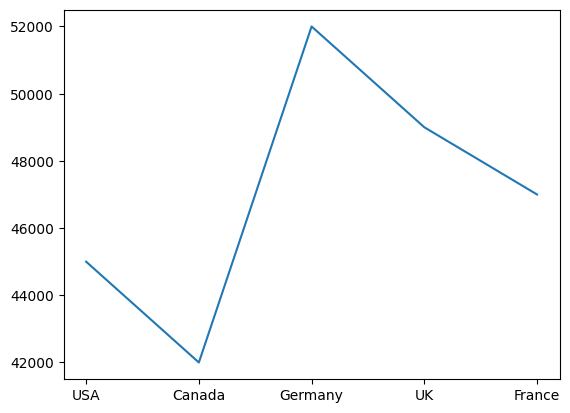

In [6]:
plt.plot(x,y);

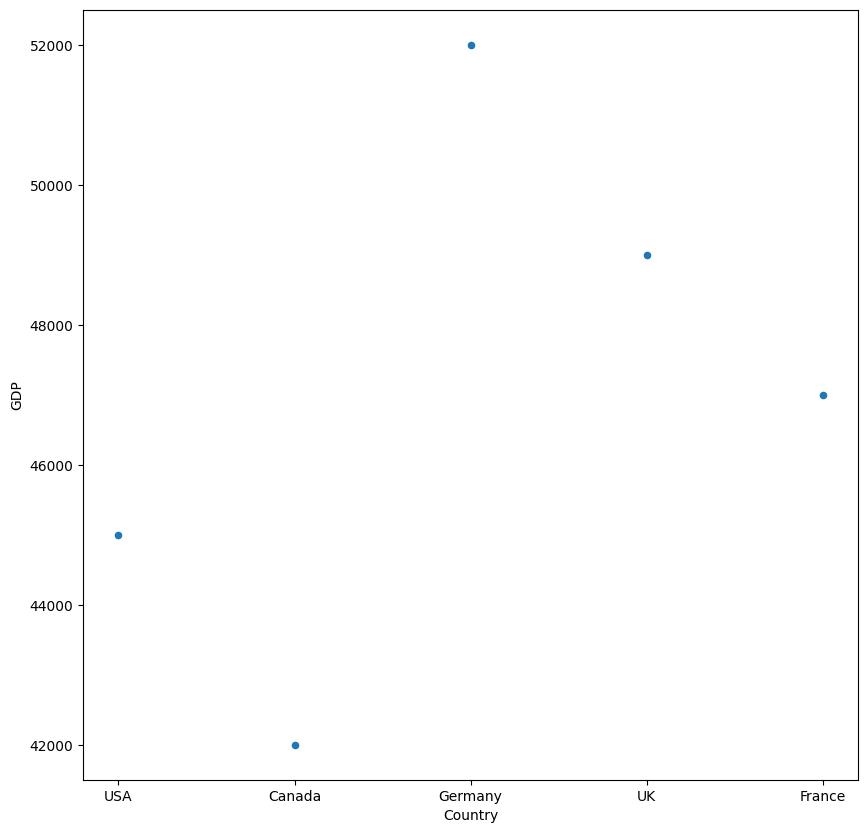

In [7]:
df.plot(x ='Country',y='GDP', figsize=(10, 10), kind = 'scatter');
#plt.show()

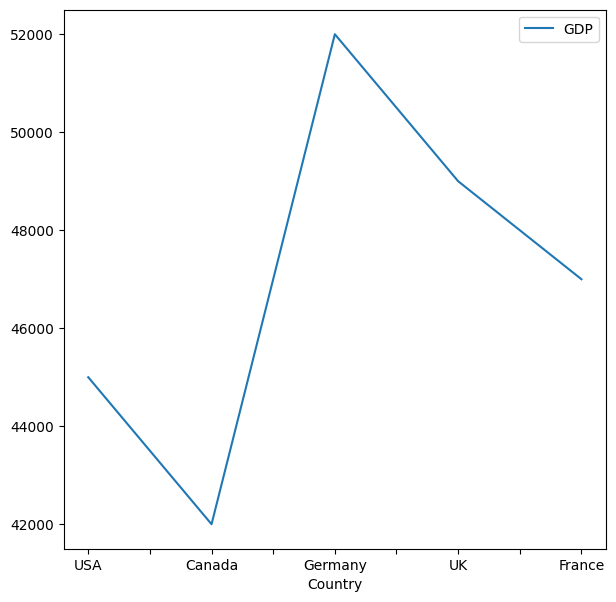

In [8]:
df.plot(x ='Country',y='GDP', figsize=(7, 7),kind = 'line');
#plt.show()

In [9]:
Data = {'Tasks': [300,500,700]}
df = pd.DataFrame(Data,columns=['Tasks'])

In [10]:
df

,Tasks
0,300
1,500
2,700


In [11]:
df = pd.DataFrame(Data,columns=['Tasks'],
                  index = ['Tasks Pending','Tasks Ongoing','Tasks Completed'])
df.head()

,Tasks
Tasks Pending,300
Tasks Ongoing,500
Tasks Completed,700


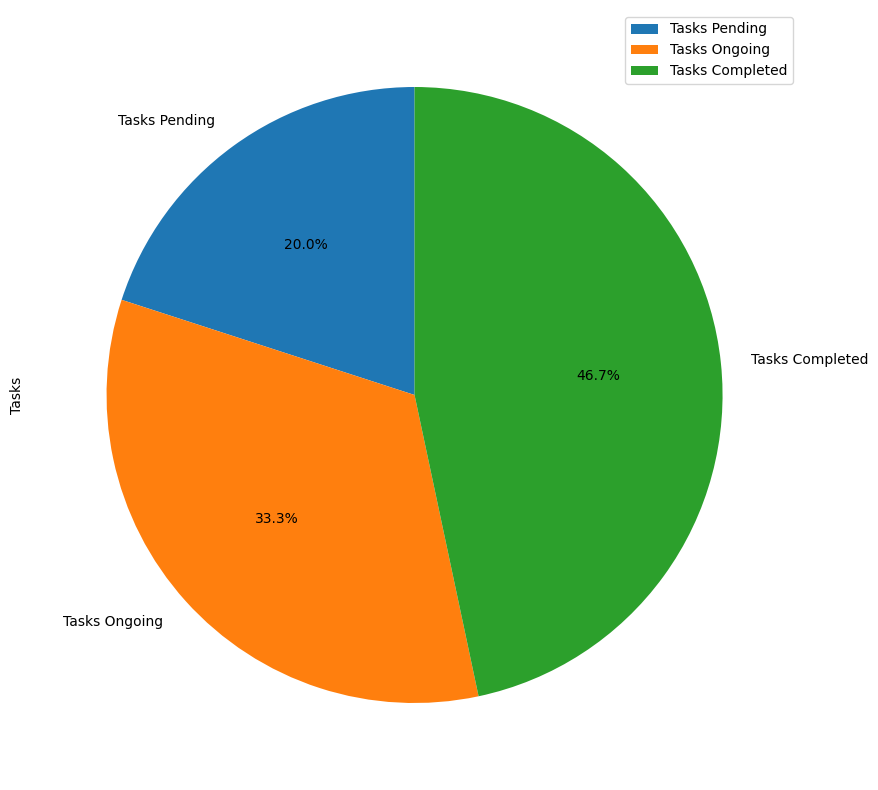

In [17]:
df.plot(y='Tasks',
        figsize=(10, 10),
        autopct='%1.1f%%',
        startangle=90,
        kind='pie',
        );

In [ ]:
### Groupby

In [18]:
url_superficie = "https://it.wikipedia.org/wiki/Primi_100_comuni_italiani_per_superficie"

In [19]:
comuni_superficie = pd.read_html(url_superficie,
                                 attrs={"class":"wikitable"},
                                 header=0)

comuni_superficie = comuni_superficie[0]

In [20]:
comuni_superficie = comuni_superficie.rename(columns={'Superficie (km²)': 'Superficie'})

In [22]:
comuni_superficie.head()

,Pos.,Comune,Regione,Provincia,Superficie
0,1,Roma,Lazio,Roma,"1 287,24"
1,2,Ravenna,Emilia-Romagna,Ravenna,65381
2,3,Cerignola,Puglia,Foggia,59392
3,4,Noto,Sicilia,Siracusa,55498
4,5,Sassari,Sardegna,Sassari,54703


In [ ]:
comuni_superficie.groupby('Regione').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
reg = comuni_superficie.groupby('Regione')
reg.aggregate([np.mean, np.std, pd.Series.count])

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count()

In [ ]:
comuni_superficie.groupby('Regione')['Superficie'].count().sort_values(ascending=False)

In [ ]:
## PETS

In [23]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


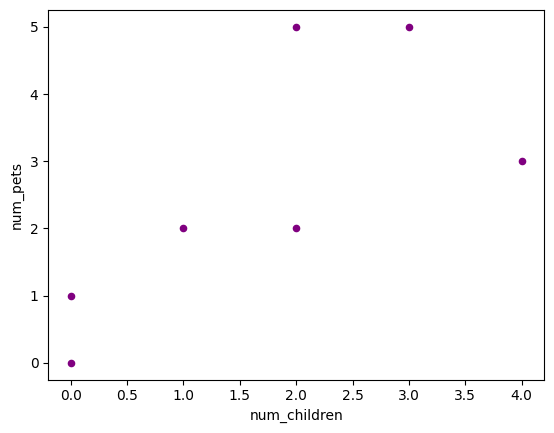

In [26]:
df.plot(kind='scatter',x='num_children',y='num_pets',color='purple');

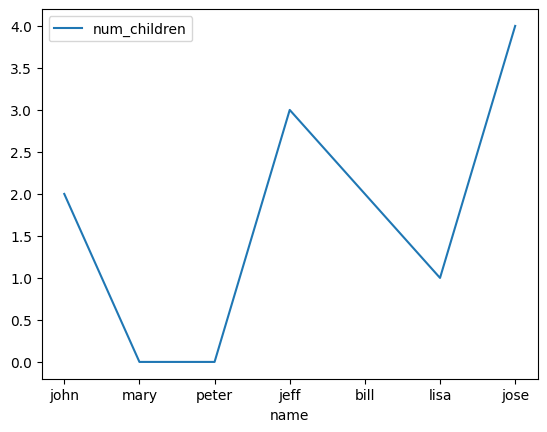

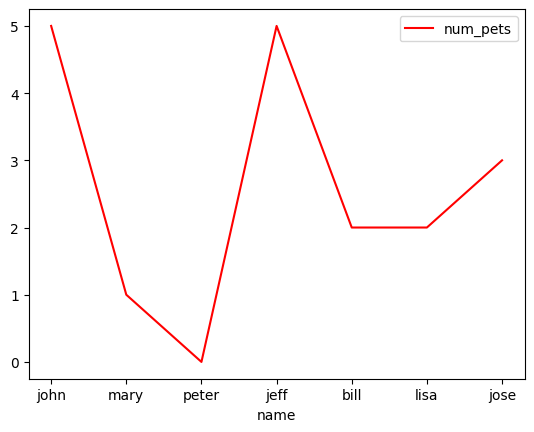

In [27]:
df.plot(kind='line',x='name',y='num_children')
df.plot(kind='line',x='name',y='num_pets', color='red');


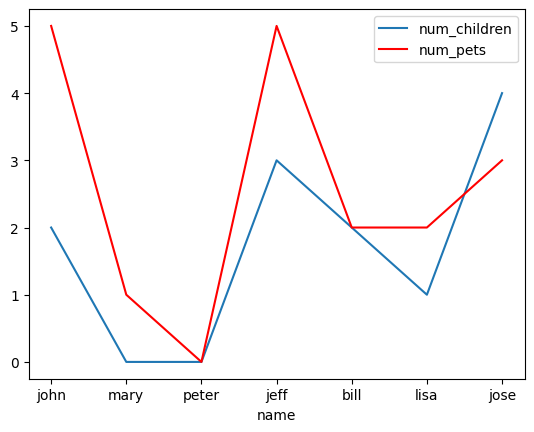

In [24]:
# gca stands for 'get current axis'
ax = plt.gca()
df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red', ax=ax);

#plt.show()

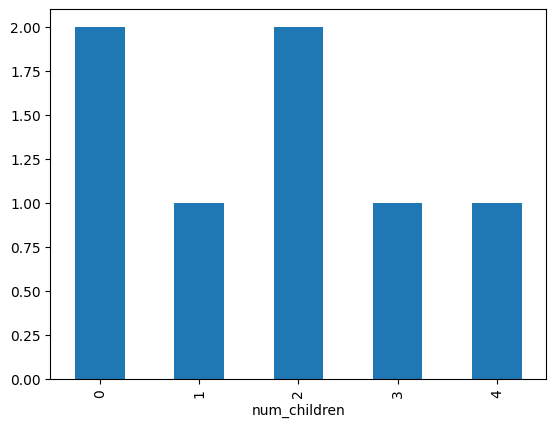

In [30]:
df.groupby('num_children').size().plot(kind='bar');

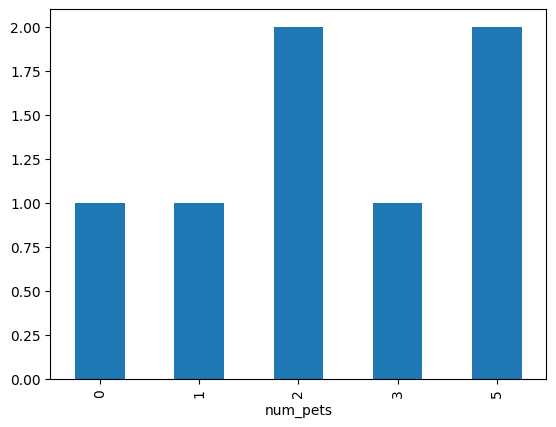

In [33]:
df.groupby('num_pets').size().plot(kind='bar');

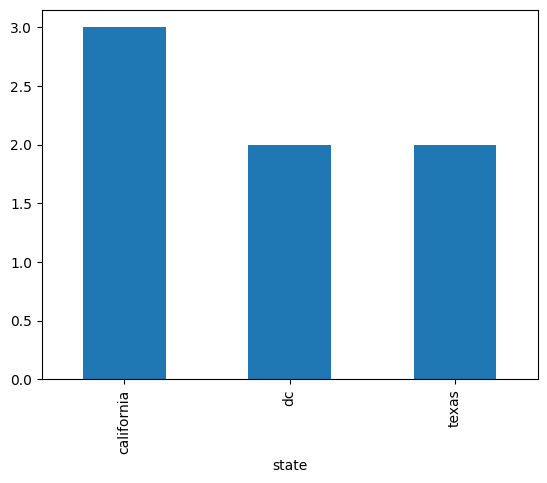

In [34]:
df.groupby('state').size().plot(kind='bar');

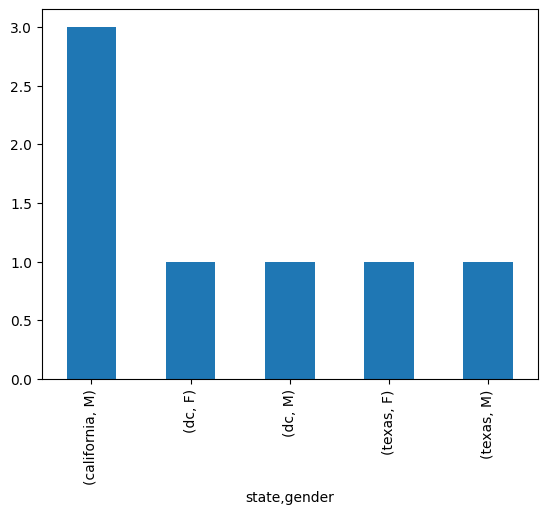

In [36]:
df.groupby(['state','gender']).size().plot(kind='bar');

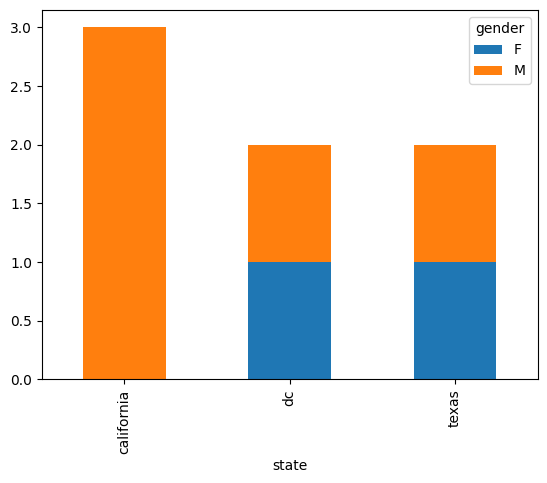

In [37]:
df.groupby(['state','gender']).size().unstack().plot(kind='bar',stacked=True);

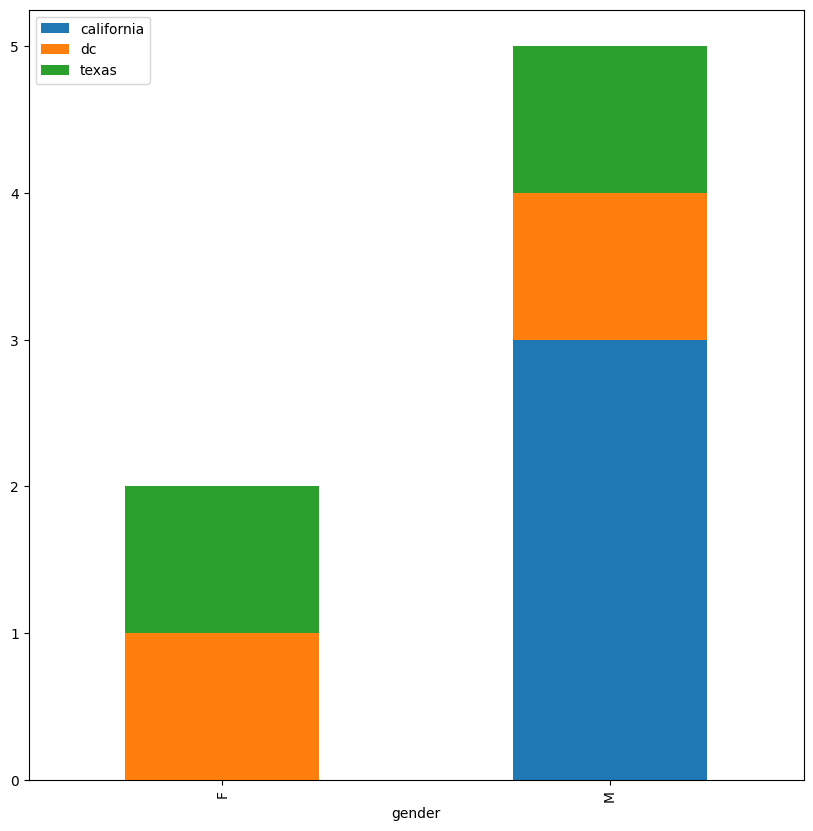

In [39]:
df.groupby(['gender','state']).size().unstack().plot(kind='bar',
                                                     stacked=True,
                                                     figsize=(10, 10))
plt.legend(loc='upper left');